# 24.07.12 머신러닝 학습 3회차: 결정 트리

## 01 개념

### 결정 트리(Decision Tree)

1. 데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리(Tree) 기반의 분류 규칙을 만드는 것이다.

2. 데이터를 어떤 기준을 바탕으로 <규칙>을 만들어야 가장 효율적인 분류가 될 것인가.

3. 자식 노드가 없으면 리프 노드, 자식 노드가 있으면 브랜치 노드.

4. 과적합을 막기 위해 가능한 한 적은 결정 노드로 높은 예측 정확도를 가지려면?

5. 분류할 때 최대한 많은 데이터 세트가 해당 분류에 속할 수 있는 결정 노드의 <규칙>이 정해져야 한다.

6. 가장 큰 장점은 정보의 <균일도>라는 룰을 기반으로 하여 알고리즘이 쉽고 직관적이다.

7. <균일도>만 신경쓰면 되므로 특별한 경우를 제외하고 스케일링, 정규화 전처리가 필요없다.

### 분할 규칙

1. 최대한 <균일한> 데이터 세트를 구성할 수 있도록 분할하는 것이 필요하다.

2. 데이터 세트가 <균일>하지 않을수록 필요한 정보의 양이 많아진다.

3. 결정 노드는 <정보 균일도>가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만든다.

4. 많은 데이터가 공통적으로 가진 규칙이 있다면 그게 가장 첫 번째로 만들어져야 하는 규칙일테니까.

5. 왜냐면 적은 정보의 양으로 가장 쉽게 예측할 수 있고, 그다음 순서로 가는 게 가장 효율적이니까.

### 정보의 균일도 측정

1. 엔트로피 개념을 기반으로 한 정보 이득 지수,  지니 계수가 있다.

2. 엔트로피는 데이터 집합의 혼잡도를 의미한다. 균일할수록 낮다.

3. 정보 이득 지수는 1-엔트로피 지수이다. 즉, 높은 속성을 기준으로 분할한다.

4. 지니계수는 균일할수록 0에 가깝다고 해석해 낮은 속성을 기준으로 분할한다.

5. DecisionTreeClassifier는 기본으로 지니 계수를 이용해 데이터 세트를 분할한다.

## 02 기본 실습

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)
# dt_clf = DecisionTreeClassifier(min_samples_leaf=6, random_state=156).fit(X_features, y=labels)

iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

export_graphviz()는 Graphviz가 읽어 들여서 그래프 형태로 시각화할 수 있는 출력 파일을 생성한다.

In [16]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함.
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names, \
                feature_names=iris_data.feature_names, impurity=True, filled=True) # impurity, filled의 의미는?

학습이 완료된 estimator, output 파일명, 결정클래스의 명칭, 피처의 명칭 등을 입력하면 출력 파일이 생성된다.

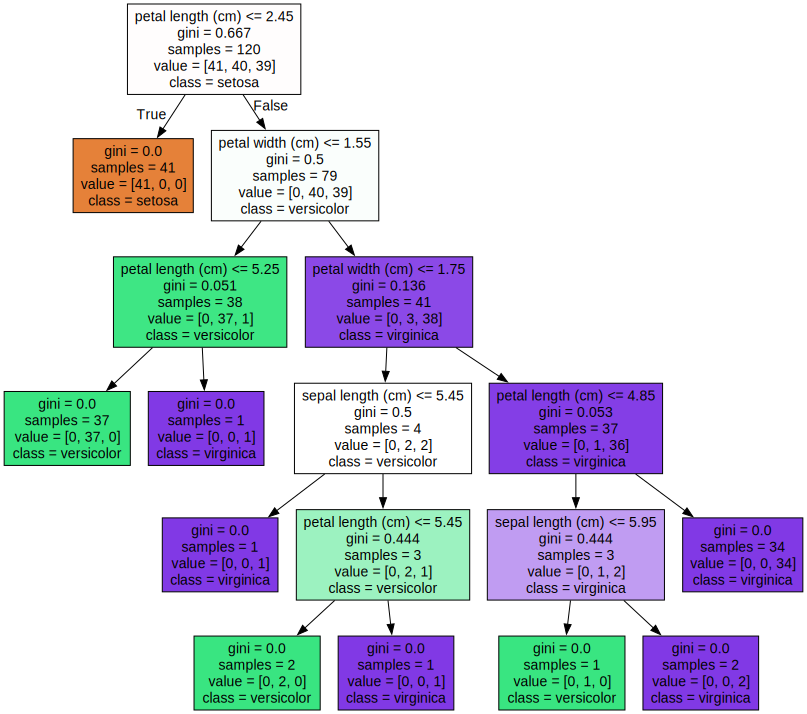

In [17]:
import graphviz

# 위에서 생성된 파일을 Graphviz가 읽어서 주피터 노트북상에서 시각화, 한단계 하위버전 적용.
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

색깔은 레이블을 나타낸다. 짙어질수록 = 지니계수가 낮다 = 균일하다.

In [12]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함.
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names, \
                feature_names=iris_data.feature_names, impurity=True, filled=True, max_depth=4)

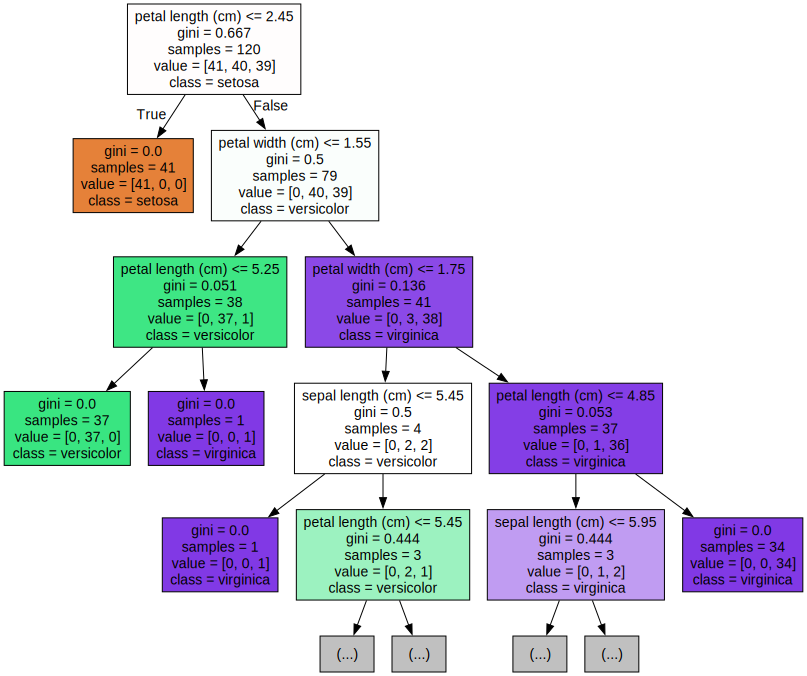

In [13]:
import graphviz

# 위에서 생성된 파일을 Graphviz가 읽어서 주피터 노트북상에서 시각화, 한단계 하위버전 적용.
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

최대 트리 깊이를 제어하니까 원래 보이던게 말줄임표로 나타나네.

In [21]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance는 피처가 트리 분할 시 정보 이득이나 지나 계수를 얼마나 효율적으로 잘 개선시켰는지를 정규화된 값으로 표현한 것이다.
print(f"Feature importanves: {np.round(dt_clf.feature_importances_, 3)}")

# 피처별로 importanve 매핑한다면?
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print(f'{name} : {value:.3f}')

Feature importanves: [0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


<Axes: >

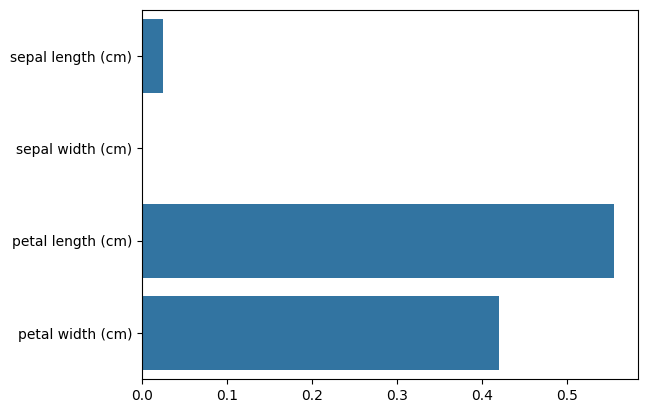

In [23]:
# 피처 중요도를 컬럼 별로 시각화하기 > petal_length가 가장 높음.
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

### min_samples_leaf = 6 이라면?

왼쪽 오른쪽 자식 노드 모두가 데이터 샘플 수 최소 6개는 되어야 한다.

6개 이하의 데이터는 리프 노드를 생성할 수 있도록 리프 노트 생성 규칙 완화

값을 키우면 분할될 수 있는 조건이 어렵게 된다. ㅇㅇ

그러므로 리프 노드(=클래스 결정)가 될 수 있는 조건이 상대적으로 완화된다.

즉, 더 이상 분할되지 않고 리프 노트가 될 수 있는 가능성이 높아진다.

## 03 관련 프로젝트: 사용자 행동 인식 데이터 세트에 대한 예측 분류

### 데이터 전처리가 오래 걸림;

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 피처 이름 인덱스와 피처명이 공백으로 분리되어 있음. names는 컬럼이름이다.
feature_name_df = pd.read_csv('./dataset/human_activity/features.txt', sep='\s+',
                              header=None, names=['column_index', 'column_name'])

# 피처 이름 인덱스를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:,1].values.tolist()
print('전체 피처명에서 10개만 추출:', feature_name[:10])

전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


1. header=None: 첫 번째 행을 열 제목으로 사용하지 않고 데이터로 취급한다.

2. names=['column_index', 'column_name']: 열 이름을 수동으로 지정한다.

In [112]:
# 중복되는 변수명 체크 해봤다.
from collections import Counter
cnt = Counter(feature_name)
cnt

Counter({'fBodyAcc-bandsEnergy()-1,8': 3,
         'fBodyAcc-bandsEnergy()-9,16': 3,
         'fBodyAcc-bandsEnergy()-17,24': 3,
         'fBodyAcc-bandsEnergy()-25,32': 3,
         'fBodyAcc-bandsEnergy()-33,40': 3,
         'fBodyAcc-bandsEnergy()-41,48': 3,
         'fBodyAcc-bandsEnergy()-49,56': 3,
         'fBodyAcc-bandsEnergy()-57,64': 3,
         'fBodyAcc-bandsEnergy()-1,16': 3,
         'fBodyAcc-bandsEnergy()-17,32': 3,
         'fBodyAcc-bandsEnergy()-33,48': 3,
         'fBodyAcc-bandsEnergy()-49,64': 3,
         'fBodyAcc-bandsEnergy()-1,24': 3,
         'fBodyAcc-bandsEnergy()-25,48': 3,
         'fBodyAccJerk-bandsEnergy()-1,8': 3,
         'fBodyAccJerk-bandsEnergy()-9,16': 3,
         'fBodyAccJerk-bandsEnergy()-17,24': 3,
         'fBodyAccJerk-bandsEnergy()-25,32': 3,
         'fBodyAccJerk-bandsEnergy()-33,40': 3,
         'fBodyAccJerk-bandsEnergy()-41,48': 3,
         'fBodyAccJerk-bandsEnergy()-49,56': 3,
         'fBodyAccJerk-bandsEnergy()-57,64': 3,
        

In [96]:
# 피처명 인덱스와 피처명이 공백으로 분리되어 있는 걸 데이터프레임으로 가져온 상태를 보여준다.
feature_name_df

,column_index,column_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y
...,...,...
556,557,"angle(tBodyGyroMean,gravityMean)"
557,558,"angle(tBodyGyroJerkMean,gravityMean)"
558,559,"angle(X,gravityMean)"
559,560,"angle(Y,gravityMean)"


### 함수1

1. .cumcount(): 각 열 이름의 중복 횟수를 의미한다.

2. 람다함수의 활용 이해하기: 익숙하지 않음.

In [84]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name','dup_cnt']].apply(lambda x: x[0]+'_'+str(x[1]) if x[1]>0 else x[0], axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [111]:
cumcount = feature_name_df.groupby('column_name').cumcount()
# type(cumcount) # 결과: pandas.core.series.Series
cumcount.value_counts()

0    477
1     42
2     42
Name: count, dtype: int64

1. 하나의 컬럼이 3번 쓰이면: 중복 횟수는 2?

2. 하나의 컬럼이 2번 쓰이면: 중복 횟수는 1?

3. 중복 횟수 숫자를 구별 번호로 사용할 것임!

In [113]:
feature_dup_df = pd.DataFrame(data=feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
feature_dup_df

,dup_cnt
0,0
1,0
2,0
3,0
4,0
...,...
556,0
557,0
558,0
559,0


각각 인덱스 초기화를 진행한다. 기존에 사용하던 열이 새로운 인덱스 열로 추가되니 이후에 불필요시 제거한다.

In [114]:
feature_dup_df = feature_dup_df.reset_index()
feature_dup_df

,index,dup_cnt
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
556,556,0
557,557,0
558,558,0
559,559,0


In [115]:
rest_df = feature_name_df.reset_index()
rest_df

,index,column_index,column_name
0,0,1,tBodyAcc-mean()-X
1,1,2,tBodyAcc-mean()-Y
2,2,3,tBodyAcc-mean()-Z
3,3,4,tBodyAcc-std()-X
4,4,5,tBodyAcc-std()-Y
...,...,...,...
556,556,557,"angle(tBodyGyroMean,gravityMean)"
557,557,558,"angle(tBodyGyroJerkMean,gravityMean)"
558,558,559,"angle(X,gravityMean)"
559,559,560,"angle(Y,gravityMean)"


In [116]:
new_feature_name_df = pd.merge(feature_name_df.reset_index(), feature_dup_df, how='outer')
new_feature_name_df

,index,column_index,column_name,dup_cnt
0,0,1,tBodyAcc-mean()-X,0
1,1,2,tBodyAcc-mean()-Y,0
2,2,3,tBodyAcc-mean()-Z,0
3,3,4,tBodyAcc-std()-X,0
4,4,5,tBodyAcc-std()-Y,0
...,...,...,...,...
556,556,557,"angle(tBodyGyroMean,gravityMean)",0
557,557,558,"angle(tBodyGyroJerkMean,gravityMean)",0
558,558,559,"angle(X,gravityMean)",0
559,559,560,"angle(Y,gravityMean)",0


In [117]:
new_feature_name_df['column_name'] = new_feature_name_df[['column_name','dup_cnt']].apply(lambda x: x[0]+'_'+str(x[1]) if x[1]>0 else x[0], axis=1)
new_feature_name_df

,index,column_index,column_name,dup_cnt
0,0,1,tBodyAcc-mean()-X,0
1,1,2,tBodyAcc-mean()-Y,0
2,2,3,tBodyAcc-mean()-Z,0
3,3,4,tBodyAcc-std()-X,0
4,4,5,tBodyAcc-std()-Y,0
...,...,...,...,...
556,556,557,"angle(tBodyGyroMean,gravityMean)",0
557,557,558,"angle(tBodyGyroJerkMean,gravityMean)",0
558,558,559,"angle(X,gravityMean)",0
559,559,560,"angle(Y,gravityMean)",0


1. 데이터프레임 생성: column_name과 dup_cnt 열을 포함하는 <데이터프레임>을 생성한다.

2. 람다 함수 적용: apply(lambda x: ..., axis=1)을 사용하여 <각 행>에 대해 람다 함수를 적용한다.

3. x는 각 행을 나타내는 <시리즈>로, x[0]은 column_name, x[1]은 dup_cnt 값을 가진다.

3. x[1] > 0인 경우, column_name에 _dup_cnt를 추가하여 새로운 열 이름을 만든다. 그렇지 않으면 원래 column_name을 유지한다.

4. 즉, apply 메서드를 사용할 때 axis=1을 지정하면 → **각 행이 시리즈로 x에 전달**된다.

In [118]:
new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
new_feature_name_df

,column_index,column_name,dup_cnt
0,1,tBodyAcc-mean()-X,0
1,2,tBodyAcc-mean()-Y,0
2,3,tBodyAcc-mean()-Z,0
3,4,tBodyAcc-std()-X,0
4,5,tBodyAcc-std()-Y,0
...,...,...,...
556,557,"angle(tBodyGyroMean,gravityMean)",0
557,558,"angle(tBodyGyroJerkMean,gravityMean)",0
558,559,"angle(X,gravityMean)",0
559,560,"angle(Y,gravityMean)",0


### 함수2

In [74]:
import pandas as pd

def get_human_dataset():
    # feature_name_df 불러오는 코드는 앞서 만들었음. 중복된 피처명을 수정한다.
    new_feature_name_df = get_new_feature_name_df(feature_name_df)

    # 이것도 아까 작성한 컬럼만 빼내는 코드
    feature_name = new_feature_name_df.iloc[:,1].values.tolist()

    X_train = pd.read_csv('./dataset/human_activity/train/X_train.txt', sep='\s+', names=feature_name) # 컬럼 이름 리스트가 여기에 쓰인다.
    X_test = pd.read_csv('./dataset/human_activity/test/X_test.txt', sep='\s+', names=feature_name)

    y_train = pd.read_csv('./dataset/human_activity/train/y_train.txt', sep='\s+', names=['action']) # 변수명을 action으로 지정한다.
    y_test = pd.read_csv('./dataset/human_activity/test/y_test.txt', sep='\s+', names=['action'])

    return X_train, X_test, y_train, y_test # 4개의 변수 반환값을 아래에 변수 그대로 받음.

X_train, X_test, y_train, y_test = get_human_dataset()

In [66]:
new_feature_name_df = get_new_feature_name_df(feature_name_df)
new_feature_name_df

,column_index,column_name,dup_cnt
0,1,tBodyAcc-mean()-X,0
1,2,tBodyAcc-mean()-Y,0
2,3,tBodyAcc-mean()-Z,0
3,4,tBodyAcc-std()-X,0
4,5,tBodyAcc-std()-Y,0
...,...,...,...
556,557,"angle(tBodyGyroMean,gravityMean)",0
557,558,"angle(tBodyGyroJerkMean,gravityMean)",0
558,559,"angle(X,gravityMean)",0
559,560,"angle(Y,gravityMean)",0


In [68]:
X_train

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.070157,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.165259,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.195034,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,0.013865,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339


In [70]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB


In [71]:
y_train['action'].value_counts()

action
6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: count, dtype: int64

### 분류 예측 수행(1)

In [121]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 반복마다 동일한 결과를 얻기 위해 난수 설정, 설핏예평
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)

print(f'예측 정확도: {accuracy:.4f}')

# 하이퍼파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n', dt_clf.get_params())

예측 정확도: 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 156, 'splitter': 'best'}


### 분류 예측 수행(2) - 교차 검증

In [123]:
from sklearn.model_selection import GridSearchCV

prams = {
    'max_depth' : [6,8,10,12,16,20,24], # 이전엔 시각화할 때 추가해 봤음.
    'min_samples_split' : [16]
}

grid_CV = GridSearchCV(dt_clf, param_grid=prams, scoring='accuracy', cv=5, verbose=1)
grid_CV.fit(X_train, y_train)

print(f'GridSerchCV 최고 평균 정확도 수치: {grid_CV.best_score_}')
print(f'GridSerchCV 최적 하이퍼 파라미터: {grid_CV.best_params_}')

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSerchCV 최고 평균 정확도 수치: 0.8548794147162603
GridSerchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [125]:
# 그리드서치 객체의 cv_results_ 속성
cv_results_df = pd.DataFrame(grid_CV.cv_results_)
cv_results_df[:3]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.633290,0.012065,0.004325,0.002196,6,16,"{'max_depth': 6, 'min_samples_split': 16}",0.813732,0.868117,0.819728,0.866667,0.870068,0.847662,0.025350,5
1,2.063478,0.041563,0.007496,0.004571,8,16,"{'max_depth': 8, 'min_samples_split': 16}",0.806254,0.830048,0.860544,0.874830,0.902721,0.854879,0.033764,1
2,2.408838,0.052874,0.005811,0.004187,10,16,"{'max_depth': 10, 'min_samples_split': 16}",0.804895,0.816451,0.866667,0.884354,0.891156,0.852705,0.035427,2


In [126]:
cv_results_df[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.847662
1,8,0.854879
2,10,0.852705
3,12,0.845768
4,16,0.847127
5,20,0.848624
6,24,0.848624


## 04 참고 링크

http://archive.ics.uci.edu/dataset/240/human+activity+recognition+using+smartphones